In [1]:
import json
import urllib.request # library to handle requests
from bs4 import BeautifulSoup # Scaping Libraries
import pandas as pd # library for data analysis
import numpy as np # Library to handle data in a vectorized manner
from IPython.display import Image
from IPython.core.display import HTML
#transforming json file into a pandas dataframe Library
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim

In [2]:
#This project is based on the need to determine potential locations by Postal Code in Kansas City, Missouri for a pizza store.

In [3]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [4]:
#Kansas City MO
latitude = 39.0997
longitude = -94.5786

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [6]:
import folium

In [7]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
map_clusters

In [9]:
search_query = 'Pizza'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f026e3a644de62efaf35ffb'},
 'response': {'venues': [{'id': '4af31b30f964a520b3ea21e3',
    'name': 'Pizza Bar',
    'location': {'address': '1320 Grand Blvd',
     'crossStreet': 'btwn E 13th & 14th St',
     'lat': 39.09791381573249,
     'lng': -94.58160864964103,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.09791381573249,
       'lng': -94.58160864964103}],
     'distance': 327,
     'postalCode': '64106',
     'cc': 'US',
     'neighborhood': 'Power',
     'city': 'Kansas City',
     'state': 'MO',
     'country': 'United States',
     'formattedAddress': ['1320 Grand Blvd (btwn E 13th & 14th St)',
      'Kansas City, MO 64106',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'shortName': 'Pizza',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
       'suffix': '.png'},
      'primary': True}],
 

In [12]:
venues = results['response']['venues']
dataframe = json_normalize(venues) # flatten JSON

dataframe.head(5)

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",1633673,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/pizza-bar-1...,False,4af31b30f964a520b3ea21e3,1320 Grand Blvd,...,"[1320 Grand Blvd (btwn E 13th & 14th St), Kans...","[{'label': 'display', 'lat': 39.09791381573249...",39.097914,-94.581609,Power,64106,MO,Pizza Bar,v-1593995337,NaN
1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b019e70f964a520ff4322e3,427 Main St,...,"[427 Main St (at E 5th St), Kansas City, MO 64...","[{'label': 'display', 'lat': 39.10853604046443...",39.108536,-94.582662,NaN,64105,MO,Minsky's Pizza,v-1593995337,NaN
2,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b944769f964a520a37234e3,1020 Broadway St.,...,"[1020 Broadway St. (at W 11th St), Kansas City...","[{'label': 'display', 'lat': 39.10132919448023...",39.101329,-94.588600,NaN,64105,MO,Pizza Hut,v-1593995337,NaN
3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",2001502,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/buffalo-sta...,False,5eb2e9414bf8dd0008834cc4,1815 Wyandotte St,...,"[1815 Wyandotte St, Kansas City, MO 64108, Uni...","[{'label': 'display', 'lat': 39.091404, 'lng':...",39.091404,-94.585880,NaN,64108,MO,Buffalo Street Pizza Co.,v-1593995337,NaN
4,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",1755842,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/spin-pizza-...,False,55008ea0498ef17172c53198,2450 Grand Blvd,...,"[2450 Grand Blvd, Kansas City, MO 64108, Unite...","[{'label': 'display', 'lat': 39.08250864, 'lng...",39.082509,-94.582532,NaN,64108,MO,SPIN! Neapolitan Pizza,v-1593995337,NaN


In [13]:

# filter columns
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith ('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
                    
# clean columns
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.sort_values('postalCode')


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
13,451 Pizza,Pizza Place,NaN,US,Kansas City,United States,NaN,2000,"[Kansas City, MO 64101, United States]","[{'label': 'display', 'lat': 39.100315, 'lng':...",39.100315,-94.601739,NaN,64101,MO,5dbc9dad1b29440007dd1ca2
1,Minsky's Pizza,Pizza Place,427 Main St,US,Kansas City,United States,at E 5th St,1044,"[427 Main St (at E 5th St), Kansas City, MO 64...","[{'label': 'display', 'lat': 39.10853604046443...",39.108536,-94.582662,NaN,64105,MO,4b019e70f964a520ff4322e3
2,Pizza Hut,Pizza Place,1020 Broadway St.,US,Kansas City,United States,at W 11th St,882,"[1020 Broadway St. (at W 11th St), Kansas City...","[{'label': 'display', 'lat': 39.10132919448023...",39.101329,-94.588600,NaN,64105,MO,4b944769f964a520a37234e3
0,Pizza Bar,Pizza Place,1320 Grand Blvd,US,Kansas City,United States,btwn E 13th & 14th St,327,"[1320 Grand Blvd (btwn E 13th & 14th St), Kans...","[{'label': 'display', 'lat': 39.09791381573249...",39.097914,-94.581609,Power,64106,MO,4af31b30f964a520b3ea21e3
5,Domino's Pizza,Pizza Place,531 Grand Blvd Ste 4,US,Kansas City,United States,btwn W 11th & 12th St,895,"[531 Grand Blvd Ste 4 (btwn W 11th & 12th St),...","[{'label': 'display', 'lat': 39.107687, 'lng':...",39.107687,-94.579804,NaN,64106,MO,58c70a133e88355bb46c240d
3,Buffalo Street Pizza Co.,Pizza Place,1815 Wyandotte St,US,Kansas City,United States,NaN,1117,"[1815 Wyandotte St, Kansas City, MO 64108, Uni...","[{'label': 'display', 'lat': 39.091404, 'lng':...",39.091404,-94.585880,NaN,64108,MO,5eb2e9414bf8dd0008834cc4
4,SPIN! Neapolitan Pizza,Pizza Place,2450 Grand Blvd,US,Kansas City,United States,NaN,1943,"[2450 Grand Blvd, Kansas City, MO 64108, Unite...","[{'label': 'display', 'lat': 39.08250864, 'lng...",39.082509,-94.582532,NaN,64108,MO,55008ea0498ef17172c53198
6,Providence Pizza,Pizza Place,1707 Locust St Fl 1,US,Kansas City,United States,NaN,766,"[1707 Locust St Fl 1, Kansas City, MO 64108, U...","[{'label': 'display', 'lat': 39.09286955460416...",39.092870,-94.577525,NaN,64108,MO,5ba8333a16ef6700394650fb
7,Papa John's Pizza,Pizza Place,1911 McGee St,US,Kansas City,United States,NaN,1082,"[1911 McGee St, Kansas City, MO 64108, United ...","[{'label': 'display', 'lat': 39.09002299999999...",39.090023,-94.579875,NaN,64108,MO,5a1c4a8286f4cc016d5ea26b
18,Minsky's Pizza,Pizza Place,3063 Southwest Blvd,US,Kansas City,United States,at W 31st St,3930,"[3063 Southwest Blvd (at W 31st St), Kansas Ci...","[{'label': 'display', 'lat': 39.07221991343523...",39.072220,-94.607160,NaN,64108,MO,5686e0e8498eb224e64290a2


In [14]:
# set number of clusters
kclusters = 4
zip_clustering = dataframe_filtered.drop(['name','categories','address','cc','city','country','crossStreet','formattedAddress','labeledLatLngs','neighborhood','state','id','postalCode'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zip_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([1, 1, 1, 1, 2, 1, 1, 1, 0, 0], dtype=int32)

In [15]:
# add clustering labels
dataframe_filtered.insert(0, 'Cluster Labels', kmeans.labels_)

dataframe_filtered.reset_index(drop = True)
dataframe_filtered.head(30) 


,Cluster Labels,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,1,Pizza Bar,Pizza Place,1320 Grand Blvd,US,Kansas City,United States,btwn E 13th & 14th St,327,"[1320 Grand Blvd (btwn E 13th & 14th St), Kans...","[{'label': 'display', 'lat': 39.09791381573249...",39.097914,-94.581609,Power,64106,MO,4af31b30f964a520b3ea21e3
1,1,Minsky's Pizza,Pizza Place,427 Main St,US,Kansas City,United States,at E 5th St,1044,"[427 Main St (at E 5th St), Kansas City, MO 64...","[{'label': 'display', 'lat': 39.10853604046443...",39.108536,-94.582662,NaN,64105,MO,4b019e70f964a520ff4322e3
2,1,Pizza Hut,Pizza Place,1020 Broadway St.,US,Kansas City,United States,at W 11th St,882,"[1020 Broadway St. (at W 11th St), Kansas City...","[{'label': 'display', 'lat': 39.10132919448023...",39.101329,-94.588600,NaN,64105,MO,4b944769f964a520a37234e3
3,1,Buffalo Street Pizza Co.,Pizza Place,1815 Wyandotte St,US,Kansas City,United States,NaN,1117,"[1815 Wyandotte St, Kansas City, MO 64108, Uni...","[{'label': 'display', 'lat': 39.091404, 'lng':...",39.091404,-94.585880,NaN,64108,MO,5eb2e9414bf8dd0008834cc4
4,2,SPIN! Neapolitan Pizza,Pizza Place,2450 Grand Blvd,US,Kansas City,United States,NaN,1943,"[2450 Grand Blvd, Kansas City, MO 64108, Unite...","[{'label': 'display', 'lat': 39.08250864, 'lng...",39.082509,-94.582532,NaN,64108,MO,55008ea0498ef17172c53198
5,1,Domino's Pizza,Pizza Place,531 Grand Blvd Ste 4,US,Kansas City,United States,btwn W 11th & 12th St,895,"[531 Grand Blvd Ste 4 (btwn W 11th & 12th St),...","[{'label': 'display', 'lat': 39.107687, 'lng':...",39.107687,-94.579804,NaN,64106,MO,58c70a133e88355bb46c240d
6,1,Providence Pizza,Pizza Place,1707 Locust St Fl 1,US,Kansas City,United States,NaN,766,"[1707 Locust St Fl 1, Kansas City, MO 64108, U...","[{'label': 'display', 'lat': 39.09286955460416...",39.092870,-94.577525,NaN,64108,MO,5ba8333a16ef6700394650fb
7,1,Papa John's Pizza,Pizza Place,1911 McGee St,US,Kansas City,United States,NaN,1082,"[1911 McGee St, Kansas City, MO 64108, United ...","[{'label': 'display', 'lat': 39.09002299999999...",39.090023,-94.579875,NaN,64108,MO,5a1c4a8286f4cc016d5ea26b
8,0,Wheats Pizza,Pizza Place,612 N 5th st,US,Wyandotte County,United States,NaN,3975,"[612 N 5th st, Wyandotte County, KS, United St...","[{'label': 'display', 'lat': 39.11266144615798...",39.112661,-94.621483,NaN,NaN,KS,4b96e25bf964a5203ceb34e3
9,0,"Haha's Pizza, Gyro's & Mediterranean Food",Mediterranean Restaurant,3834 Main St,US,Kansas City,United States,btwn W 38th & 39th St,4789,"[3834 Main St (btwn W 38th & 39th St), Kansas ...","[{'label': 'display', 'lat': 39.05710054497081...",39.057101,-94.586341,NaN,64111,MO,582f4dee9f25833ffd79c3c8


In [16]:
# create cluster map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for latitude, longitude, poi, cluster in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['postalCode'], dataframe_filtered['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        Color = rainbow[int(cluster)-1],
        #color=rainbow,
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
      
map_clusters


In [17]:
#Number of pizza Stores per Postal Code horizontal bar chart

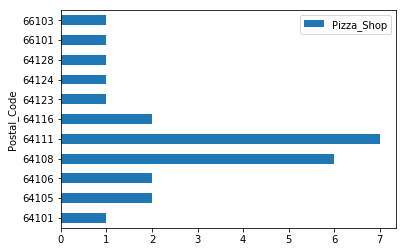

In [18]:
from pandas import DataFrame   
Data = {'Postal_Code': [64101,64105,64106,64108,64111,64116,64123,64124,64128,66101,66103],
        'Pizza_Shop': [1,2,2,6,7,2,1,1,1,1,1]
                        }
  
df = DataFrame(Data,columns=['Postal_Code','Pizza_Shop'])
df.plot(x ='Postal_Code', y ='Pizza_Shop', kind = 'barh')
plt.show()

In [19]:
#Number of pizza stores per postal code vertical bar chart

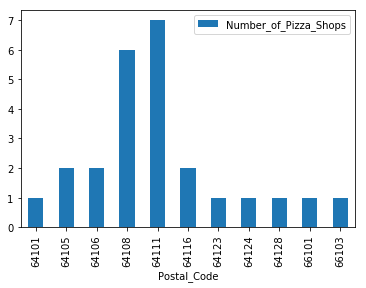

In [20]:
   
Data = {'Postal_Code': [64101,64105,64106,64108,64111,64116,64123,64124,64128,66101,66103],
        'Number_of_Pizza_Shops': [1,2,2,6,7,2,1,1,1,1,1]
                        }
df = DataFrame(Data,columns=['Postal_Code','Number_of_Pizza_Shops']) 
df.plot(x ='Postal_Code', y='Number_of_Pizza_Shops', kind = 'bar')
plt.show()

In [21]:
#Number of pizza stores based on population by postal code

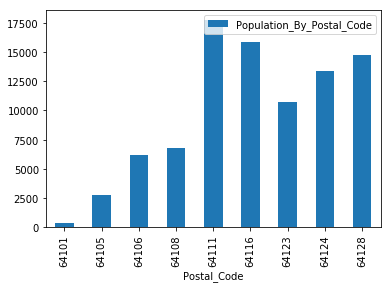

In [22]:
Data = {'Postal_Code': [64101,64105,64106,64108,64111,64116,64123,64124,64128],
        'Population_By_Postal_Code': [335,2719,6142,6785,17745,15846,10757,13343,14774]
                        }
df = DataFrame(Data,columns=['Postal_Code','Population_By_Postal_Code']) 
df.plot(x ='Postal_Code', y='Population_By_Postal_Code', kind = 'bar')
plt.show()

In [23]:
# Number of Stores per capita

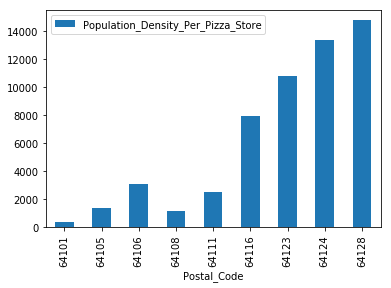

In [24]:
Data = {'Postal_Code': [64101,64105,64106,64108,64111,64116,64123,64124,64128],
        'Population_Density_Per_Pizza_Store': [355,1359,3071,1130,2535,7923,10757,13343,14774]
                        }
df = DataFrame(Data,columns=['Postal_Code','Population_Density_Per_Pizza_Store']) 
df.plot(x ='Postal_Code', y='Population_Density_Per_Pizza_Store', kind = 'bar')
plt.show()

In [25]:
#Median Income based on Postal Code

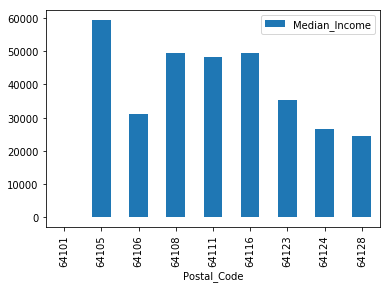

In [26]:
Data = {'Postal_Code': [64101,64105,64106,64108,64111,64116,64123,64124,64128],
        'Median_Income': [-1,59474,31104,49500,48105,49352,35290,26512,24421]
                        }
df = DataFrame(Data,columns=['Postal_Code','Median_Income']) 
df.plot(x ='Postal_Code', y='Median_Income', kind = 'bar')
plt.show()

In [27]:
#Number of Stores based on median income

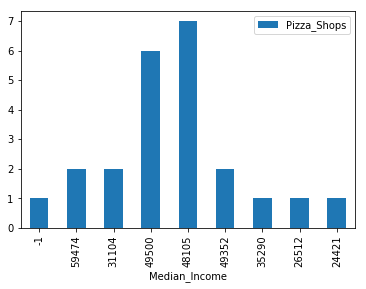

In [28]:
  
Data = {'Median_Income': [-1,59474,31104,49500,48105,49352,35290,26512,24421],
        'Pizza_Shops': [1,2,2,6,7,2,1,1,1]
                        }
df = DataFrame(Data,columns=['Median_Income','Pizza_Shops']) 
df.plot(x ='Median_Income', y='Pizza_Shops', kind = 'bar')
plt.show()